In [1]:
import pandas as pd
import geopandas as gpd
from h3_utils import *
import h3
import h3pandas

import ee
ee.Initialize()

import geemap

In [2]:
nga = gpd.read_file(r'..\data\Nigeria_-_State_Boundaries.zip')

<Axes: >

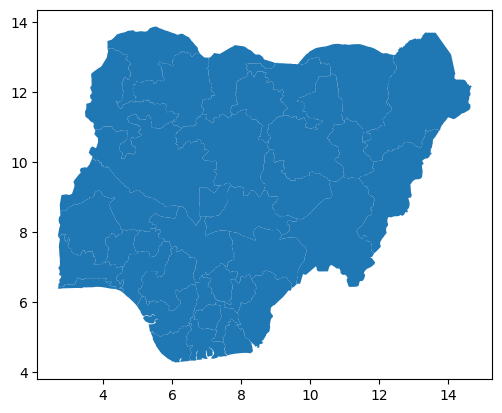

In [3]:
nga.plot()

In [4]:
hex6 = hex_generator(nga,6)

Starting...
Done
Generating hex at level 6
Done


In [5]:
hex6.shape

(27853, 2)

In [6]:
ss = ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']

In [7]:
south_states = nga[nga['statename'].isin(ss)]

In [8]:
hex8 = hex_generator(south_states,8)

Starting...
Done
Generating hex at level 8
Done


In [9]:
hex8.shape

(46306, 2)

In [10]:
hex8.head()

,hex8,geometry
0,8858d64487fffff,"POLYGON ((7.62823 5.87632, 7.62713 5.87222, 7...."
1,8858d64851fffff,"POLYGON ((7.37269 5.79951, 7.37161 5.79542, 7...."
2,8882da8907fffff,"POLYGON ((7.47152 5.10464, 7.47044 5.10060, 7...."
3,8858d6d18bfffff,"POLYGON ((7.25131 6.34010, 7.25022 6.33598, 7...."
4,88588b261dfffff,"POLYGON ((7.19085 6.07867, 7.18978 6.07457, 7...."


In [11]:
south_states

,FID,globalid,uniq_id,timestamp,editor,statename,statecode,capcity,source,geozone,SHAPE_Leng,SHAPE_Area,geometry
20,21,80db4727-d196-4bd9-9b36-51f728d80de2,1165,2018-12-13,abraham.oluseye,Anambra,AN,Awka,eHA_Polio,SEZ,3.624593,0.393537,"POLYGON ((6.86365 5.74933, 6.86324 5.74965, 6...."
24,25,d4bea7a2-3d76-4985-938c-61dd493be2cb,1169,2018-12-13,abraham.oluseye,Imo,IM,Owerri,WHO,SEZ,2.794305,0.416382,"POLYGON ((7.38548 5.50336, 7.38477 5.50151, 7...."
28,29,5a651043-340f-4235-9270-bdff3be5ecc3,1174,2018-12-13,abraham.oluseye,Abia,AB,Umuahia,WHO,SEZ,4.566081,0.391390,"POLYGON ((7.47943 4.92413, 7.47872 4.91954, 7...."
34,35,7d0f6cce-4fc4-4562-aed6-c1e297dcff20,1170,2018-12-13,abraham.oluseye,Enugu,EN,Enugu,WHO,SEZ,4.380752,0.623461,"POLYGON ((7.53338 6.01098, 7.52006 6.02002, 7...."
36,37,7f949ae4-887f-4fe0-99a4-3d09aaa27d0e,1173,2018-12-13,abraham.oluseye,Ebonyi,EB,Abakaliki,eHA_Polio,SEZ,4.424806,0.530099,"POLYGON ((7.59936 5.95737, 7.61311 5.95198, 7...."


In [ ]:
# hexagons_gee_list = []
# if hex6.shape[0]>1000:
#     chunks = int(np.ceil(hex6.shape[0]/1000))

#     for i in range(1,chunks+1):
#         if i!=chunks:
#             temp = hex6.iloc[(i-1)*1000:i*1000]
#             hexagons_gee_list.append(geemap.gdf_to_ee(temp))
        
#         if i==chunks:
#             temp = hex6.iloc[(i-1)*1000:]
#             hexagons_gee_list.append(geemap.gdf_to_ee(temp))

# else:
#     hexagons_gee_list.append(geemap.gdf_to_ee(hex6))

# print('Start GEE')
# hrsl_collection = ee.ImageCollection("projects/sat-io/open-datasets/hrsl/hrslpop")
# hrsl_image = hrsl_collection.mosaic()
# for idx, hex_gee in enumerate(hexagons_gee_list):
#     out_path = '../data/pop/hex6'
#     out_dir = os.path.join(out_path)
#     out_file_path = os.path.join(out_dir, f'hex6_hrsl_{idx}.csv')

#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)

#     geemap.zonal_statistics(hrsl_image, hex_gee, out_file_path, statistics_type='SUM', scale=30)

In [23]:
# hexagons_gee_list = []
# if hex6.shape[0]>1000:
#     chunks = int(np.ceil(hex6.shape[0]/1000))

#     for i in range(1,chunks+1):
#         if i!=chunks:
#             temp = hex6.iloc[(i-1)*1000:i*1000]
#             hexagons_gee_list.append(geemap.gdf_to_ee(temp))
        
#         if i==chunks:
#             temp = hex6.iloc[(i-1)*1000:]
#             hexagons_gee_list.append(geemap.gdf_to_ee(temp))

# else:
#     hexagons_gee_list.append(geemap.gdf_to_ee(hex6))

# print('Start GEE')
# ntl_collection = ee.ImageCollection('NOAA/VIIRS/DNB/ANNUAL_V21').filter(ee.Filter.date('2020-01-01', '2021-01-01'))
# ntl_image = ntl_collection.select('average').median()
# for idx, hex_gee in enumerate(hexagons_gee_list):
#     out_path = '../data/ntl/hex6'
#     out_dir = os.path.join(out_path)
#     out_file_path = os.path.join(out_dir, f'hex6_ntl_{idx}.csv')

#     if not os.path.exists(out_dir):
#         os.makedirs(out_dir)

#     geemap.zonal_statistics(ntl_image, hex_gee, out_file_path, statistics_type='SUM', scale=30)

In [26]:
hexagons_gee_list = []
if hex8.shape[0]>1000:
    chunks = int(np.ceil(hex8.shape[0]/1000))

    for i in range(1,chunks+1):
        if i!=chunks:
            temp = hex8.iloc[(i-1)*1000:i*1000]
            hexagons_gee_list.append(geemap.gdf_to_ee(temp))
        
        if i==chunks:
            temp = hex8.iloc[(i-1)*1000:]
            hexagons_gee_list.append(geemap.gdf_to_ee(temp))

else:
    hexagons_gee_list.append(geemap.gdf_to_ee(hex8))

print('Start GEE')
hrsl_collection = ee.ImageCollection("projects/sat-io/open-datasets/hrsl/hrslpop")
hrsl_image = hrsl_collection.mosaic()
for idx, hex_gee in enumerate(hexagons_gee_list):
    out_path = '../data/pop/hex8'
    out_dir = os.path.join(out_path)
    out_file_path = os.path.join(out_dir, f'hex8_hrsl_{idx}.csv')

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    geemap.zonal_statistics(hrsl_image, hex_gee, out_file_path, statistics_type='SUM', scale=30)

Start GEE
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_0.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_1.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_2.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_3.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_4.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_5.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\pop\hex8\hex8_hrsl_6.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data download

In [12]:
hexagons_gee_list = []
if hex8.shape[0]>1000:
    chunks = int(np.ceil(hex8.shape[0]/1000))

    for i in range(1,chunks+1):
        if i!=chunks:
            temp = hex8.iloc[(i-1)*1000:i*1000]
            hexagons_gee_list.append(geemap.gdf_to_ee(temp))
        
        if i==chunks:
            temp = hex8.iloc[(i-1)*1000:]
            hexagons_gee_list.append(geemap.gdf_to_ee(temp))

else:
    hexagons_gee_list.append(geemap.gdf_to_ee(hex8))

print('Start GEE')
ntl_collection = ee.ImageCollection('NOAA/VIIRS/DNB/ANNUAL_V21').filter(ee.Filter.date('2020-01-01', '2021-01-01'))
ntl_image = ntl_collection.select('average').median()
for idx, hex_gee in enumerate(hexagons_gee_list):
    out_path = '../data/ntl/hex8'
    out_dir = os.path.join(out_path)
    out_file_path = os.path.join(out_dir, f'hex8_ntl_{idx}.csv')

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    geemap.zonal_statistics(ntl_image, hex_gee, out_file_path, statistics_type='SUM', scale=30)

Start GEE
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_0.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_1.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_2.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_3.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_4.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_5.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d:\GitHub\BluePaleDot\data\ntl\hex8\hex8_ntl_6.csv
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to d

In [38]:
import os

In [46]:
hex8_pop = [pd.read_csv(os.path.join(r'../data/pop/hex8', i) ) for i in os.listdir(r'../data/pop/hex8')]
hex8_pop = pd.concat(hex8_pop).rename(columns={'sum':'pop_sum'})

In [47]:
hex8_ntl = [pd.read_csv(os.path.join(r'../data/ntl/hex8', i) ) for i in os.listdir(r'../data/ntl/hex8')]
hex8_ntl = pd.concat(hex8_ntl).rename(columns={'sum':'ntl_sum'})

In [52]:
hex8.merge(hex8_ntl[['hex8','ntl_sum']]).merge(hex8_pop[['hex8','pop_sum']]).to_file('../data/nga_ss_hex8.gpkg', driver='GPKG')